# Parrondo’s game
The topic is based on the following paper,

- R. Toral, Cooperative Parrondo’s games, Fluctuations Noise Lett. 1 (2001) L7–L12.

In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%config InlineBackend.figure_format='retina'

In [2]:
# Setting plot parameters
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [3]:
# The probability to win the game B in state \sigma_i
def piB(i, N, p1B, p2B, p3B):
    if i > np.rint((2 * N)/3):
        return p1B
    elif np.rint(N/3) <= i <= np.rint((2 * N)/3):
        return p2B
    elif i < np.rint(N/3):
        return p3B

In [4]:
# The transition probabilities for the state \sigma_i
def pi(i, N, g, pA):
    t1 = (N-i)/N
    t2 = (g * pA) +((1 - g) * piB(i, N, p1B, p2B, p3B))
    return t1 * t2
def ri(i, N, g, pA):
    t1 = ((2 * i)-N)/N
    t2 = (g * pA) +((1 - g) * piB(i, N, p1B, p2B, p3B))
    t3 = (N - i)/N
    return (t1 * t2) + t3
def qi(i, N, g, pA):
    t1 = i/N
    t2 = (g * (1 - pA)) + ((1 - g) * (1 - piB(i, N, p1B, p2B, p3B)))
    return t1 * t2

In [5]:
# Solve master eqauation
def master_equation(prob,imax,tmax):
    for t in range(0, tmax-1): 
        for box in range(0, imax ):
            prob[box, t+1] = pi(box-1, N, g, pA) * prob[box-1, t] + ri(box, N, g, pA) * prob[box, t] +\
                           qi(box+1, N, g, pA) * prob[box+1, t]
    return prob

In [6]:
# The weight factor for pAB for \sigma_i
def piAB(i, N, g,  p1B, p2B, p3B):
    return (g * pA) + ((1-g) *  piB(i, N, p1B, p2B, p3B))

In [7]:
# unnormalized stationary probability for \sigma_i
def piSt(i,N,g):
    t1=1
    t2=1
    pst=[]
    for m in range(i):
        t1*=pi(m, N, g, pA)
    for n in range(i+1,N+1):
        t2*=qi(n, N, g, pA)
    for k in range(N+1):
        pst.append(t1*t2)
    s = piAB(i, N, g,  p1B, p2B, p3B) * 1/np.sum(pst)*np.array(pst)
    return np.sum(s)

In [8]:
# Check the conservation of probability
def checkCons(tmax,prob):
    tt=np.arange(0,tmax,10)
    xx=[np.sum(prob[:,idx]) for idx in tt ]
    plt.plot(tt,xx)
    plt.ylim(0,1.1)
    plt.ylabel('Probability')
    plt.xlabel('$t$')

In [15]:
# Compute n trajectories using first reaction method
def ntrajs(n,N,g,tmax):
    M=N+1
    w=np.zeros(shape=(M,M))
    for ii in range(0,M):
        w[ii,ii]= ri(ii, N, g, pA)
    rng=np.arange(0,M-1)
    for idx in rng:
        w[idx,idx+1]= pi(idx, N, g, pA)
        w[idx+1,idx]= qi(idx+1, N, g, pA)
    trajs=[]
    #trajs2=[]
    toftrajs=[]
    gain=[]
    #gain2=[]
    for run in range(n):
        i=np.random.randint(0,M)
        t=0
        i_n=0
        tList=[t]
        iList=[i]
        #iList2=[i**2]
        gList=[0]
        #gList2=[0]
        while t < tmax:
            tn=1
            for j in range(0,M):
                if w[i,j] != 0:
                    t1=-np.log(np.random.rand())/w[i,j]
                    if (t1 < tn):
                        tn=t1
                        i_n=j
            if j==i:
                gList.append(gList[-1]+0)
            elif j>i:
                gList.append(gList[-1]+1)
            else:
                gList.append(gList[-1]-1)
            t=t+tn
            tList.append(t)
            iList.append(i)
            #iList2.append(i**2)
            #gList2.append(np.array(gList)**2)
            i=i_n
        trajs.append(iList)
        #trajs2.append(iList2)
        toftrajs.append(tList)
        gain.append(gList)
        #gain2.append(gList2)
    return toftrajs,trajs,gain

In [10]:
# compute the current JAB for a given \gamma
def current(tmax,imax,prob,g):
    allpiAB=[]
    tt=np.arange(0,tmax,10)
    for ii in range(imax+1):
        allpiAB.append(piAB(ii,N,g,p1B, p2B, p3B) )
    pAB=[np.dot(allpiAB,prob[:,idx]) for idx in tt]
    return 2*np.array(pAB)-1

In [11]:
# Compute the average of a list of lists
def avg(lst):
  zipped=list(zip(*lst))
  av=[np.mean(zipped[i]) for i in range(len(zipped))]
  return av

## trajectories

In [22]:
# Initialize
N = 100
imax=N
tmax=10000
g = 0.3
pA = 0.5
p1B = 0.79#np.random.rand()
p2B = 0.65#np.random.rand()
p3B = 0.15#np.random.rand()
#p1B = 0.686 #0.79#np.random.rand()
#p2B = 0.423# 0.65#np.random.rand()
#p3B = 0.8#0.15#np.random.rand()

Text(0, 0.5, '$n(t)$')

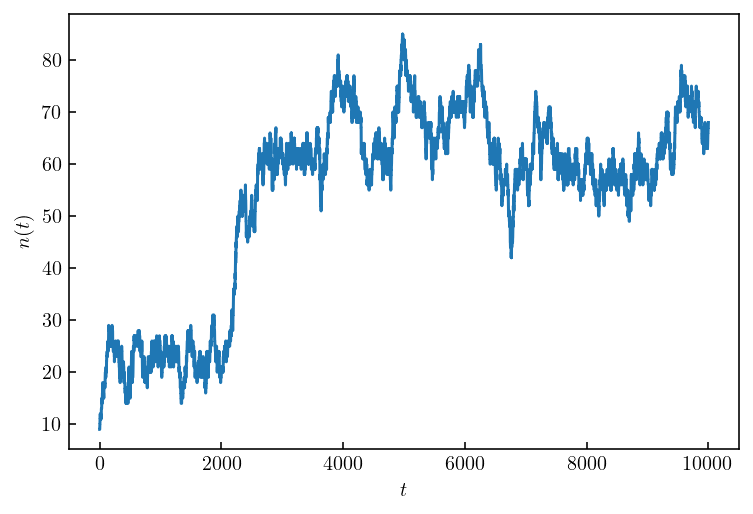

In [23]:
t1,i1,gn=ntrajs(1,N,g,tmax)
plt.plot(t1[0],i1[0])
#plt.plot(t1,i2)
plt.xlabel('$t$')
plt.ylabel('$n(t)$')

In [24]:
t1,i1,gn=ntrajs(1000,N,g,tmax)
#for k in range(len(t1)):
 #   plt.plot(t1[k],i1[k])
#plt.xlabel('$t$')
#plt.ylabel('$i$')
#plt.title('5 trajectories')

## Average and variance of $i$

In [29]:
tm=avg(t1)
iw=avg(i1)
iw2=[np.array(i1[k])**2 for k in range(len(i1))]
iwvar=avg(iw2)-np.array(iw)**2

Text(0, 0.5, '$\\sigma^2n]$')

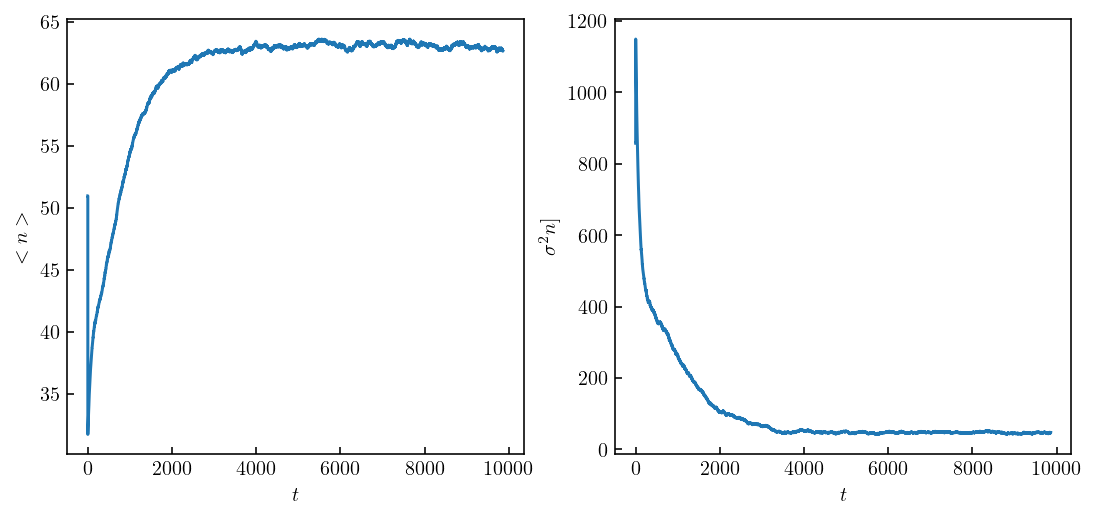

In [31]:
fig,ax=plt.subplots(1,2,figsize=(9,4))
ax[0].plot(tm,iw)
ax[1].plot(tm,iwvar)
ax[0].set_xlabel('$t$')
ax[1].set_xlabel('$t$')
ax[0].set_ylabel('$<n>$')
ax[1].set_ylabel('$\sigma^2n]$')

In [36]:
gavg=np.array(avg(gn))/N
gavg2=[(np.array(gn[k])**2) for k in range(len(gn))]
vargn=avg(gavg2)-gavg**2

Text(0, 0.5, '$\\sigma^2(t)$')

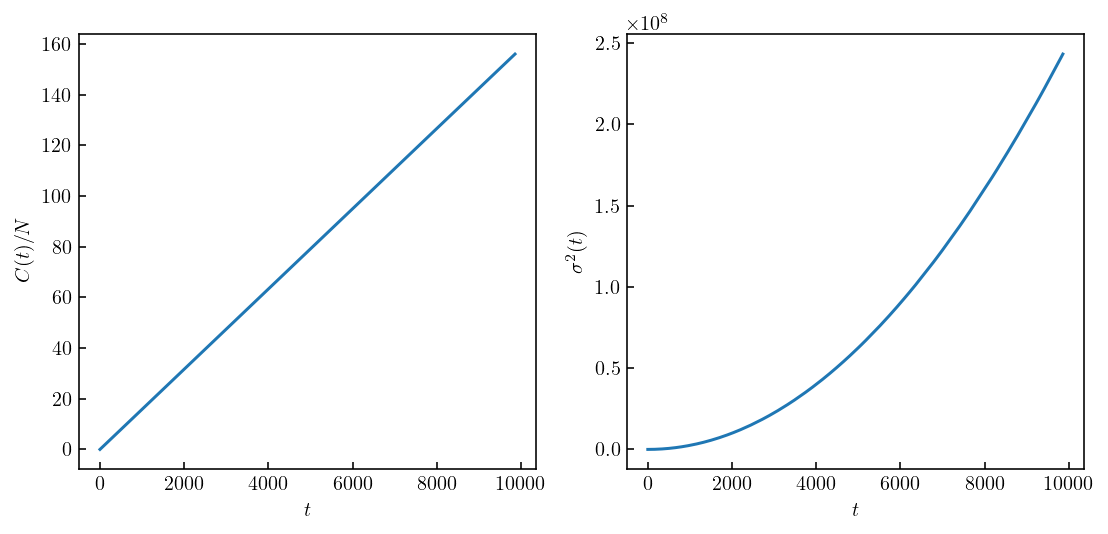

In [37]:
fig,ax=plt.subplots(1,2,figsize=(9,4))
ax[0].plot(tm,gavg)
ax[1].plot(tm,vargn)
ax[0].set_xlabel('$t$')
ax[1].set_xlabel('$t$')
ax[0].set_ylabel('$C(t)/N$')
ax[1].set_ylabel('$\sigma^2(t)$')

## Compute the current

In [38]:
prob = np.zeros((N+1, tmax))
prob[0, 0] = 1
prob=master_equation(prob,imax,tmax)

Text(0.5, 0, '$t$')

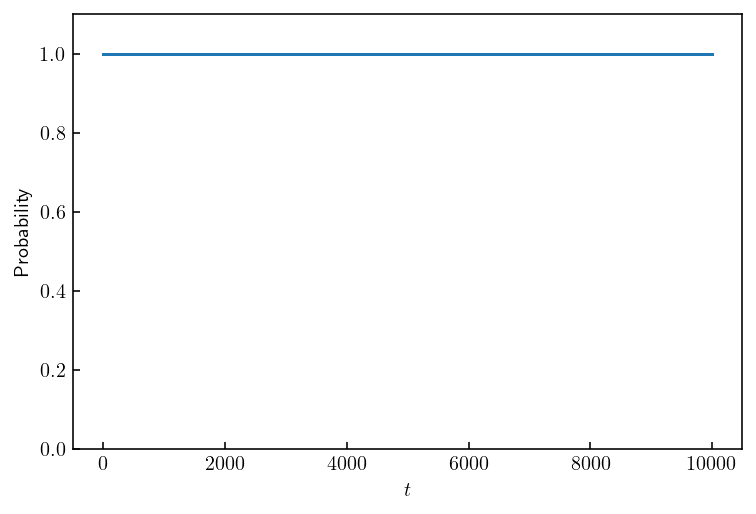

In [39]:
tt=np.arange(0,tmax,10)
xx=[np.sum(prob[:,idx]) for idx in tt ]
plt.plot(tt,xx)
plt.ylim(0,1.1)
plt.ylabel('Probability')
plt.xlabel('$t$')

Text(26.02117729899595, 0.5, '$J_{A+B}(t)$')

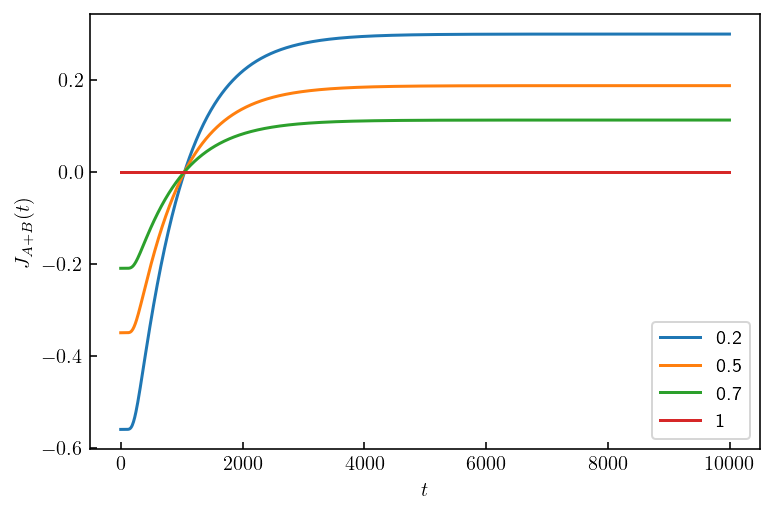

In [43]:
for g in [0.2,0.5,0.7,1]:
    plt.plot(tt,current(tmax,imax,prob,g),label=g)
plt.legend()
plt.savefig('a.jpg') 
plt.xlabel('$t$')
plt.ylabel('$J_{A+B}(t)$')

## Ends here
***